In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src import data_loader, features

In [2]:
# Load a single file
df = data_loader.load_single_file("../data/raw/AEP_hourly.csv")
print(df.head())

# Load all into a dictionary
dfs = data_loader.load_all_data("../data/raw")
print("=====================================================")
print(dfs.keys())  # -> ['AEP_hourly', 'COMED_hourly', ...]

# Load all concatenated into a single DataFrame
df_all = data_loader.load_concatenated("../data/raw")
print("=====================================================")
print(df_all.head())
print("-----------------------------------------------------")
print(df_all["region"].unique())

                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0
dict_keys(['AEP_hourly', 'COMED_hourly', 'DAYTON_hourly', 'DEOK_hourly', 'DOM_hourly', 'DUQ_hourly', 'EKPC_hourly', 'FE_hourly', 'NI_hourly', 'PJME_hourly', 'PJMW_hourly', 'pjm_hourly_est', 'PJM_Load_hourly'])
                      AEP_MW      region  COMED_MW  DAYTON_MW  DEOK_MW  \
Datetime                                                                 
2004-10-01 01:00:00  12379.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 02:00:00  11935.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 03:00:00  11692.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 04:00:00  11597.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 05:00:00  11681.0  AEP_hourly       NaN        NaN      NaN   

                     DOM_MW  DUQ_MW  EKPC_MW  FE_MW  NI_MW  ...  DEO

In [3]:
# Dataframe info
print("Dataset from", df.index.min(), "to", df.index.max())
print("=====================================================")
print("Dataset info:")
print(df.describe())
print("=====================================================")
print("First values:")
print(df.head())
print("=====================================================")
print("More info:")
print(df.info())

Dataset from 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Dataset info:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000
First values:
                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0
More info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None


In [4]:
# Frequency of the Dataframe
if df.index.inferred_freq==None:
    freq_std=df.index.to_series().diff().std()
    if freq_std!=0:
        print("The frequencies are irregular")
        print("-----------------------------------------------------")
        print("Average frequency:", df.index.to_series().diff().mean())
        print("Most common frequency:", df.index.to_series().diff().mode()[0])
        print("Standard deviation of the frequencies:", freq_std)
    else:
        print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())      
else:
    print("The frequencies are regular and their value is:", df.index.to_series().diff().mean())

The frequencies are irregular
-----------------------------------------------------
Average frequency: 0 days 01:00:00.682762715
Most common frequency: 0 days 01:00:00
Standard deviation of the frequencies: 0 days 00:00:57.553840747


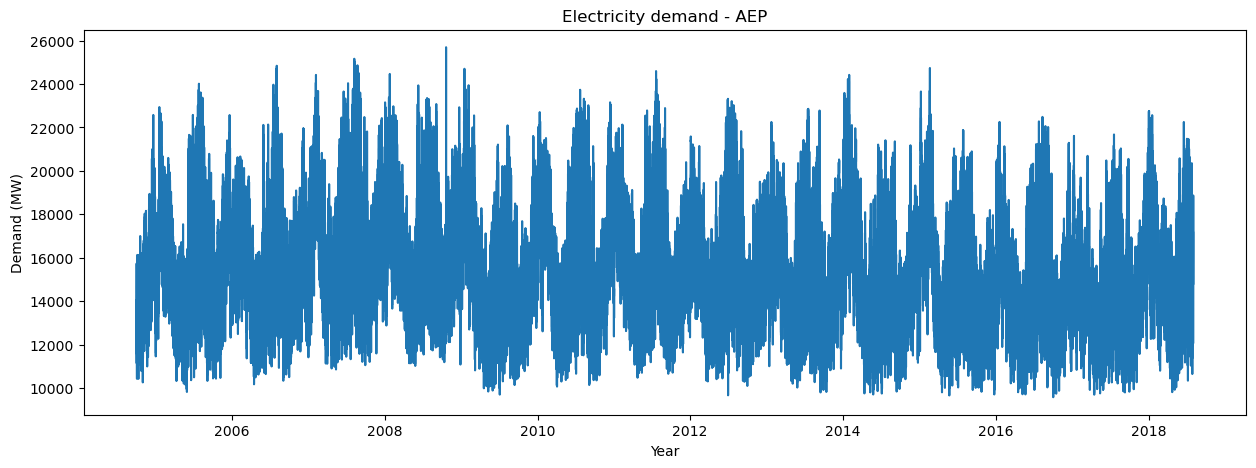

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df)
plt.title("Electricity demand - AEP")
plt.xlabel("Year")
plt.ylabel("Demand (MW)")
plt.show()

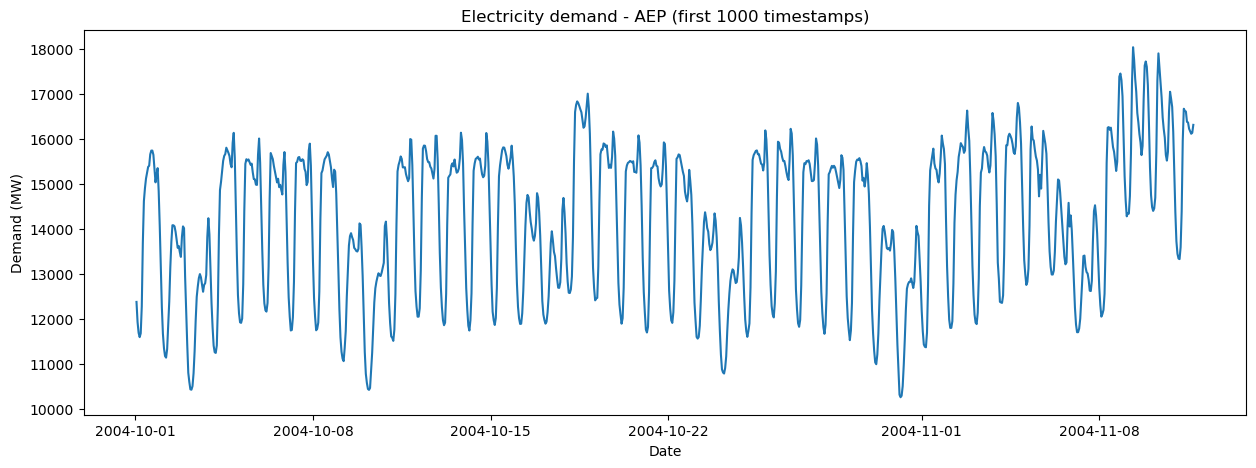

In [6]:
plt.figure(figsize=(15,5))
plt.plot(df[:1000])
plt.title("Electricity demand - AEP (first 1000 timestamps)")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.show()

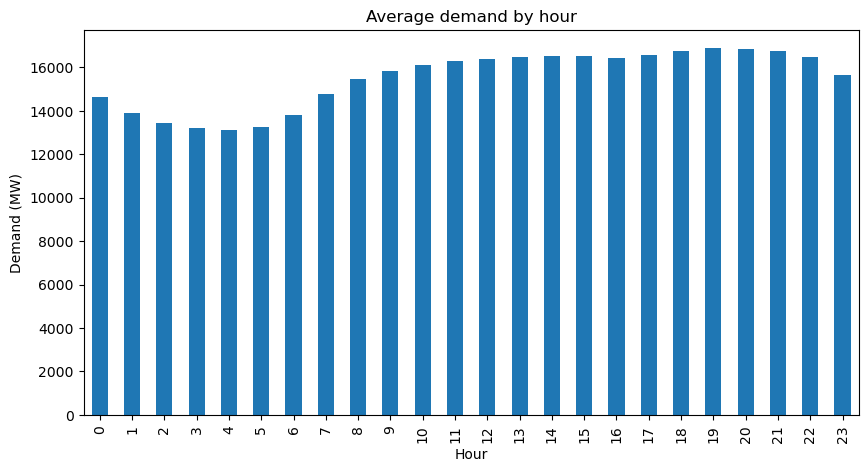

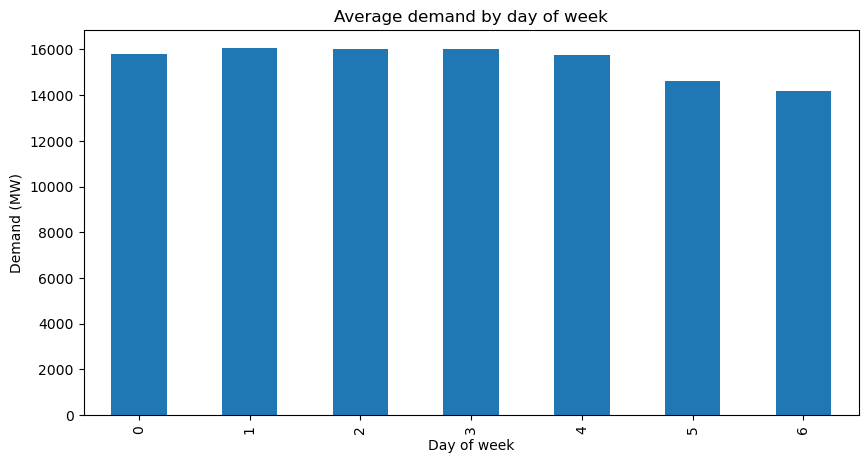

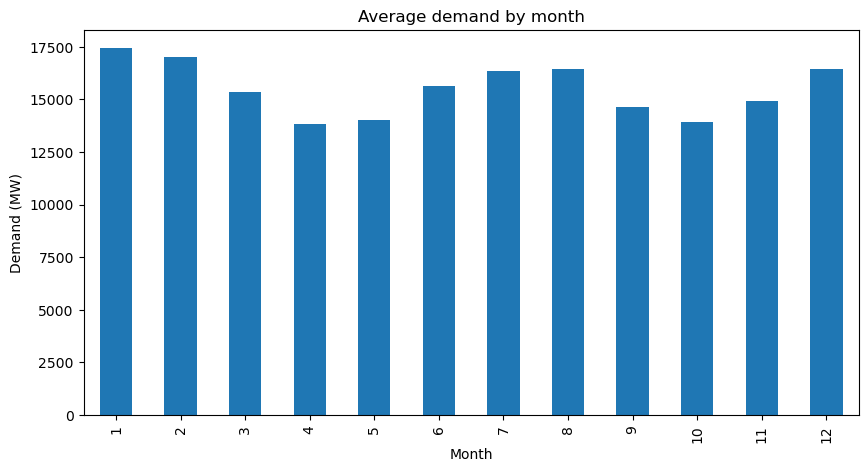

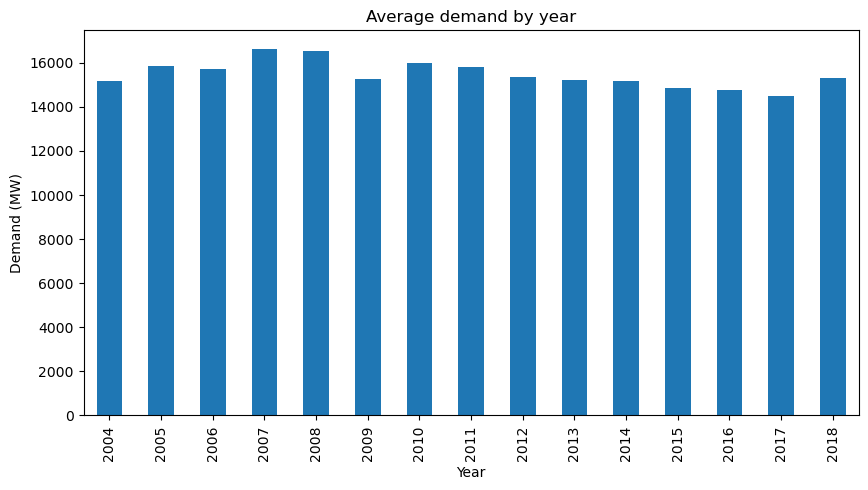

In [7]:
# Create temporal features
df = features.add_time_features(df)

# Average demands
df.groupby("Hour").mean().iloc[:,0].plot(kind="bar", figsize=(10,5), title="Average demand by hour", ylabel="Demand (MW)")
plt.show()
df.groupby("Day of week").mean().iloc[:,0].plot(kind="bar", figsize=(10,5), title="Average demand by day of week", ylabel="Demand (MW)")
plt.show()
df.groupby("Month").mean().iloc[:,0].plot(kind="bar", figsize=(10,5), title="Average demand by month", ylabel="Demand (MW)")
plt.show()
df.groupby("Year").mean().iloc[:,0].plot(kind="bar", figsize=(10,5), title="Average demand by year", ylabel="Demand (MW)")
plt.show()